In [27]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定（変更しないでください）
pd.options.display.max_columns = None

# データセットを読み込む
train_dataset = pd.read_csv("data/train.csv")
test_dataset = pd.read_csv("data/test.csv")



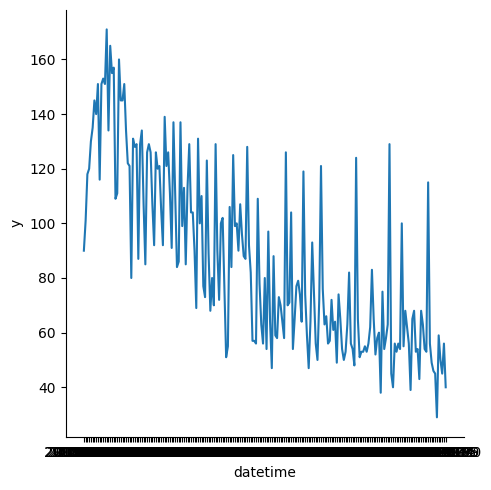

In [28]:
# データを見る
# yのグラフ
sns.relplot(data=train_dataset, x="datetime", y="y", kind="line")


<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       114 non-null    object 
 1   y              114 non-null    int64  
 2   week           114 non-null    object 
 3   soldout        114 non-null    int64  
 4   name           114 non-null    object 
 5   kcal           88 non-null     float64
 6   remarks        14 non-null     object 
 7   event          8 non-null      object 
 8   payday         9 non-null      float64
 9   weather        114 non-null    object 
 10  precipitation  114 non-null    object 
 11  temperature    114 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 11.6+ KB
None


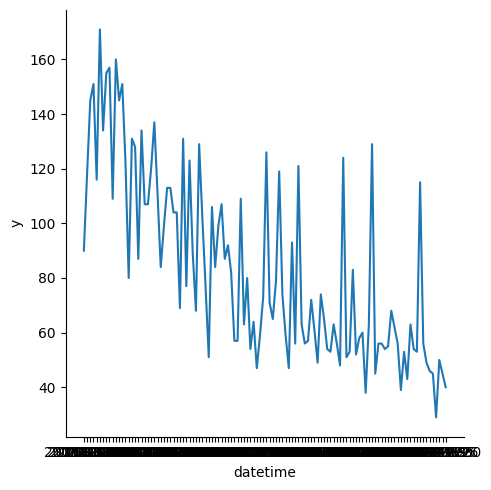

In [29]:
not_sold = train_dataset[train_dataset['soldout'] == 0]
print(not_sold.info())
sns.relplot(data=not_sold, x="datetime", y="y", kind="line")

In [ ]:
# 前後3日間で最大であれば残す
## n月n日から3日の最大値をn月n+1日に残すことでn〜n+2日のmaxをn+1日に残す
three_day_filter = train_dataset['y'].rolling(window=3, center=True).max()

print(train_dataset['y'].head(10))
print(three_day_filter.head(10))

three_day_max = train_dataset[train_dataset['y'] == three_day_filter]
print(f"フィルタリング前: {len(train_dataset)}行")
print(f"フィルタリング後: {len(three_day_max)}行")
print(three_day_max[['datetime', 'y']].head(10))

# three_day_maxを CSV出力
three_day_max.to_csv("data/train_three_day_max.csv", index=False)

"""
three_day_maxで顕著なメニュー:
ハンバーグ、ソース、鶏、カレー、カツ、チキン、牛、肉
"""

"""
お楽しみメニューが出始めた2014-03-28(84番目)以降のデータを使用する
"""

"""
3/28以降だと、顕著なメニューは
ハンバーグ、カレー、チキン、牛、ポーク、鶏、豚
"""

0     90
1    101
2    118
3    120
4    130
5    135
6    145
7    140
8    151
9    116
Name: y, dtype: int64
0      NaN
1    118.0
2    120.0
3    130.0
4    135.0
5    145.0
6    145.0
7    151.0
8    151.0
9    151.0
Name: y, dtype: float64
フィルタリング前: 207行
フィルタリング後: 66行
      datetime    y
6   2013-11-26  145
8   2013-11-28  151
11   2013-12-3  153
13   2013-12-5  171
15   2013-12-9  165
17  2013-12-11  157
20  2013-12-16  160
23  2013-12-19  151
28    2014-1-7  131
30    2014-1-9  129


'\nああ\nあ\nあ\n'

In [ ]:
# weekをone-hotエンコーディング
train_dataset2 = pd.get_dummies(train_dataset, columns=["week"], dummy_na=True)

print(train_dataset2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   soldout        207 non-null    int64  
 3   name           207 non-null    object 
 4   kcal           166 non-null    float64
 5   remarks        21 non-null     object 
 6   event          14 non-null     object 
 7   payday         10 non-null     float64
 8   weather        207 non-null    object 
 9   precipitation  207 non-null    object 
 10  temperature    207 non-null    float64
 11  week_月         207 non-null    bool   
 12  week_木         207 non-null    bool   
 13  week_水         207 non-null    bool   
 14  week_火         207 non-null    bool   
 15  week_金         207 non-null    bool   
 16  week_nan       207 non-null    bool   
dtypes: bool(6), float64(3), int64(2), object(6)
memory usa

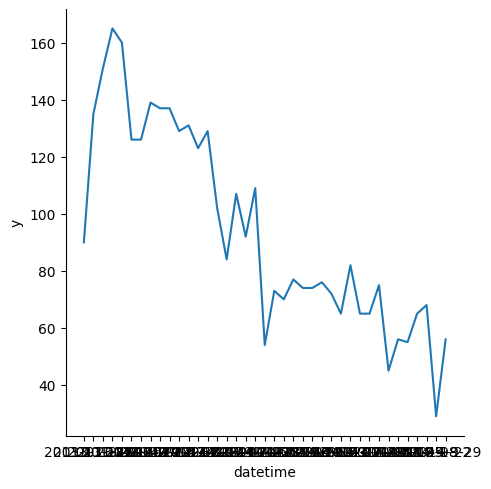

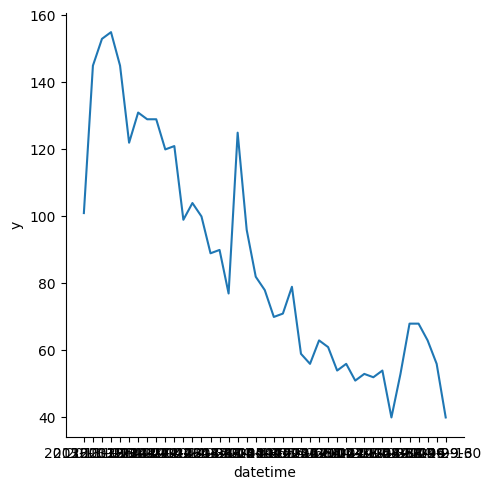

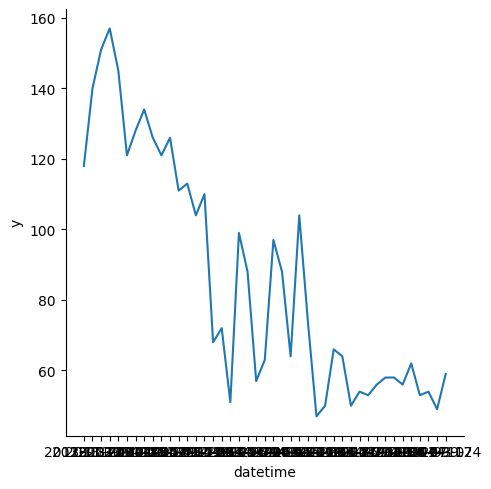

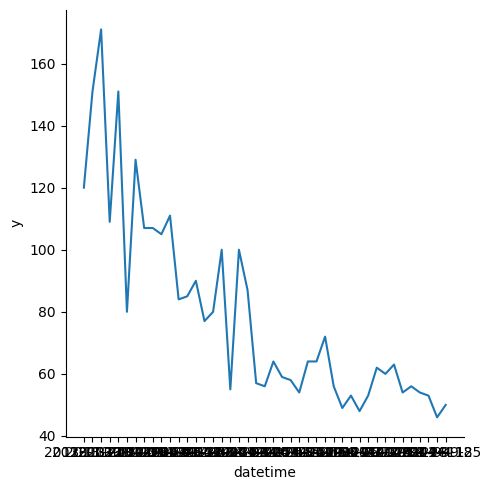

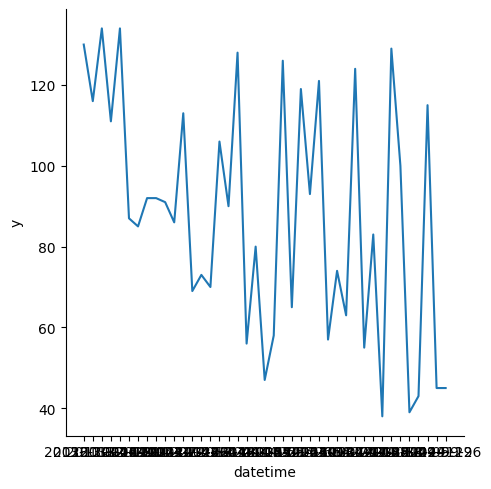

In [45]:
week = ["月", "火", "水", "木", "金"]
for w in week:
    data = train_dataset2[train_dataset2[f"week_{w}"] == 1]
    sns.relplot(data=data, x="datetime", y="y", kind="line")

# 大して法則性ない